In [1]:
# Load packages
import numpy as np
import matplotlib.pyplot as plt

# Specify the random seed and the plotting style
np.random.seed(124)
plt.style.use('ggplot')

# Problem 1
$$f(x)=2(1-x), 0\leq x\leq1$$
$$F(x)=2x-x^2, 0\leq x\leq1$$
$$F^{-1}(x)=1-\sqrt{1-x}, 0\leq x\leq1$$

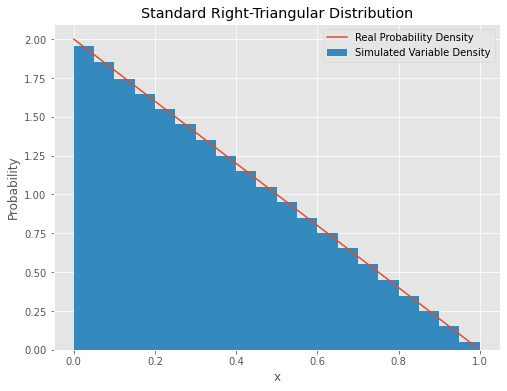

In [2]:
# Generate the random variable using the inverse transform method
n_samples = int(1e7)
unif = np.random.uniform(0, 1, n_samples)
rt_dist = 1 - np.sqrt(1 - unif)

# Calculate the population density
x1 = np.arange(0, 1, .01)
y1 = 2 * (1 - x1)
# Plot the comparison figure
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, label='Real Probability Density')
plt.hist(rt_dist, bins=20, density=True, label='Simulated Variable Density')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.title('Standard Right-Triangular Distribution')
# plt.savefig('standard_right-triangular_distribution.png')
plt.show()

# Problem 2
$$f(x)=\frac{1}{2}\textbf{1}_{(-\infty, 0)}(x)e^x+\frac{1}{2}\textbf{1}_{[0, \infty)}(x)e^{-x}$$
$$F(x)=\begin{cases}
\frac{1}{2}e^x, & x<0 \\
1-\frac{1}{2}e^{-x}, &x\geq0 \end{cases} $$
$$F^{-1}(x)=\begin{cases}
\log(2x), & 0\leq x<\frac{1}{2} \\
-\log(2-2x), & \frac{1}{2}\leq x\leq1 \end{cases} $$

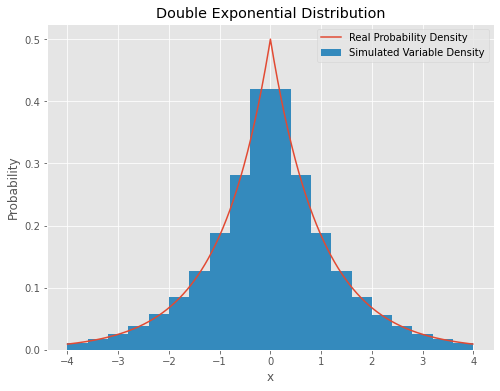

In [3]:
# Generate the random variable using the inverse transform method
doub_exp_dist = np.where(unif < 1 / 2, np.log(2 * unif), -np.log(2 - 2 * unif))

# Calculate the population density
x2 = np.arange(-4, 4, .01)
y2 = np.where(x2 < 0, np.exp(x2) / 2, np.exp(-x2) / 2)
plt.figure(figsize=(8, 6))
plt.plot(x2, y2, label='Real Probability Density')
plt.hist(doub_exp_dist, bins=20, density=True, range=(-4, 4),
         label='Simulated Variable Density')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.title('Double Exponential Distribution')
# plt.savefig('double_exponential_distribution.png')
plt.show()

# Problem 4

In [4]:
# Set the sample size
N = int(1e8)

In [5]:
# Test the Box-Muller method
def BoxMuller(size):
    for i in range(size // 2):
        u1, u2 = np.random.uniform(size=2)
        param = np.sqrt(-2 * np.log(u1))
        x = param * np.cos(2 * np.pi * u2)
        y = param * np.sin(2 * np.pi * u2)
    
%timeit -r5 -n3 BoxMuller(N)

7min 35s ± 5.53 s per loop (mean ± std. dev. of 5 runs, 3 loops each)


In [6]:
# Test the Marsaglia-Bray polar method
def Marsaglia(size):
    count = 0
    while count < size:
        v1, v2 = np.random.uniform(-1, 1, 2)
        s = v1 ** 2 + v2 ** 2
        if s <= 1:
            param = np.sqrt(-2 * np.log(s) / s)
            x = v1 * param
            y = v2 * param
            count += 2
            
%timeit -r5 -n3 Marsaglia(N)

7min 20s ± 1.6 s per loop (mean ± std. dev. of 5 runs, 3 loops each)


In [7]:
# Test the Beasley-Springer-Moro rational approximation
def BSM_Rational(size):
    a = [2.50662823884, -18.61500062529, 41.39119773534, -25.44106049637]
    b = [-8.47351093090, 23.08336743743, -21.06224101826, 3.13082909833]
    c = [0.3374754822726147, 0.9761690190917186, 0.1607979714918209,
         0.0276438810333863, 0.0038405729373609, 0.0003951896511919,
         0.0000321767881768, 0.0000002888167364, 0.0000003960315187]
    for i in range(size):
        u = np.random.uniform()
        y = u - 0.5
        if np.abs(y) < 0.42:
            r = y * y
            x = y * (((a[3] * r + a[2]) * r + a[1]) * r + a[0]) / (
                        (((b[3] * r + b[2]) * r + b[1]) * r + b[0]) * r + 1)
        else:
            r = u
            if y > 0:
                r = 1 - u
            r = np.log(-np.log(r))
            x = c[0] + r * (c[1] + r * (c[2] + r * (c[3] + r * (c[4] + r * (
                    c[5] + r * (c[6] + r * (c[7] + r * c[8])))))))
            if y < 0:
                x = -x

%timeit -r5 -n3 BSM_Rational(N)

6min 4s ± 1.11 s per loop (mean ± std. dev. of 5 runs, 3 loops each)


In [8]:
# Test the AR method with a exponential distribution
def AR_norm(size):
    count = 0
    while count < size:
        u1, u2 = np.random.uniform(size=2)
        y = -np.log(u2)
        if u1 <= np.exp(-(y - 1) ** 2 / 2):
            u3 = np.random.uniform()
            if u3 < 0.5:
                x = -y
            else:
                x = y
            count += 1
            
%timeit -r5 -n3 AR_norm(N) 

18min 41s ± 3.22 s per loop (mean ± std. dev. of 5 runs, 3 loops each)


# Problem 5

In [9]:
# Define cards to be shuffled and the 'hit' order
cards = np.arange(1, 101)
order = np.arange(1, 101)
hits = []
# Simulate 10^8 times and calculate the mean and the variance
for i in range(int(N)):
    np.random.shuffle(cards)
    hits.append(np.sum(cards == order))

print('Expectation: {:.2f}'.format(np.mean(hits)))
print('Variance: {:.2f}'.format(np.var(hits)))

Expectation: 1.00
Variance: 1.00
